In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# retrieve and import files
path = "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt"
df = pd.read_csv(path, sep=r"\s+", header=None, names=["index", "feature"])
feature_names = df.loc[:, "feature"]
print(feature_names)

# feature engineer #

# feature engineered columns
selected_indices = [
    2, 3, 4, 6, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
    41, 42, 43, 44, 45, 46, 56, 58, 59, 63, 64, 65, 66, 70, 74, 78, 79, 80,
    81, 82, 83, 107, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120,
    205, 210, 212, 213, 236, 237, 238, 239, 244, 248, 249, 251, 252,
    262, 263, 264, 265, 278, 279, 280, 291, 292, 293, 294, 295, 296,
    297, 298, 299, 300, 301, 302, 307, 338, 357, 358, 359, 370, 371,
    372, 374, 376, 378, 380, 436, 437, 438, 449, 450, 451, 452, 453,
    454, 455, 457, 459, 507, 512, 513, 514, 520, 525, 526, 527, 533,
    538, 539, 540, 546, 551, 552, 553, 555, 556, 557, 558
]

# Convert to zero-based indexing:
selected_indices = [i-1 for i in selected_indices]

# final features
features = feature_names.iloc[selected_indices].values

print(features.shape)

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: feature, Length: 561, dtype: object
(131,)


In [ ]:
# X Train feature engineering
X_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt", sep=r"\s+", header=None)
X_train = X_train.iloc[:, selected_indices]
X_train.columns = features

print("Shape of X_train:", X_train.shape)
X_train.head()

# get the activity labels
activity_df = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/activity_labels.txt", sep=r"\s+", header = None)
print(activity_df[0].tolist())
print(activity_df[1].tolist())

# import y train and label activity data
y_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt", header=None, names=["Activity Label"])
y_train['Activity'] = y_train['Activity Label'].map({
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
})

print("Shape of y_train:", y_train.shape)
y_train.head(10)

Shape of X_train: (7352, 131)
[1, 2, 3, 4, 5, 6]
['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
Shape of y_train: (7352, 2)


,Activity Label,Activity
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING
5,5,STANDING
6,5,STANDING
7,5,STANDING
8,5,STANDING
9,5,STANDING


In [ ]:
# X Test feature engineering

X_test = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt", sep=r"\s+", header=None)
X_test = X_test.iloc[:, selected_indices]
X_test.columns = features

print(X_test.shape)

# Load test labels
y_test = pd.read_csv(
    "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt",
    header=None, names=["Activity Label"]
)
y_test["Activity"] = y_test["Activity Label"].map({
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
})

(2947, 131)


In [ ]:
# Train KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train["Activity"]) # train using training sets

prediction = model.predict(X_test_scaled) # making predictions on testing sets

print(prediction)

# Use train-test-split to tune hyperparameters #



['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING']


Evaluation of Metrics of KNN Model **Before Hyperparameter Tuning**

Accuracy of predictions by KNN model on testing set: 0.841194435
F1-score of predictions by KNN model on testing set: 0.8409464066
Per-class recall of predictions by KNN model on testing set: 0.841194435

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.98      0.92      0.95       537
  WALKING_UPSTAIRS       0.79      0.73      0.76       491
WALKING_DOWNSTAIRS       0.77      0.87      0.82       532
           SITTING       0.74      0.99      0.84       496
          STANDING       0.93      0.70      0.80       420
            LAYING       0.93      0.79      0.85       471

          accuracy                           0.84      2947
         macro avg       0.86      0.84      0.84      2947
      weighted avg       0.86      0.84      0.84      2947


Confusion Matrix:


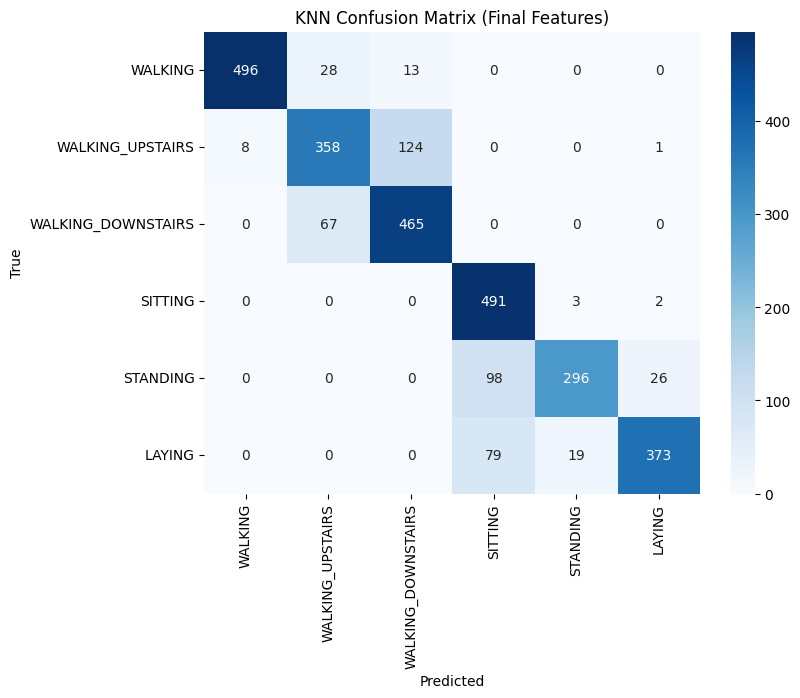

In [ ]:
# evaluate accuracy of KNN model before hyperparameter tuning
accuracy = accuracy_score(y_test['Activity'], prediction)
print("Accuracy of predictions by KNN model on testing set:",
      round(accuracy, 10))

# F1-score of KNN model before hyperparameter tuning
f1 = f1_score(y_test['Activity'], prediction, average='weighted')
print("F1-score of predictions by KNN model on testing set:",
      round(f1, 10))

# Per-class recall of KNN model before hyperparameter tuning
recall = recall_score(y_test['Activity'], prediction, average='weighted')
print("Per-class recall of predictions by KNN model on testing set:",
      round(recall, 10))

# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], prediction,
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))

# Confusion Matrix of KNN model before hyperparameter tuning
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test["Activity"], prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"],
            yticklabels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix (Final Features)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])


knn_param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],           # 1 = manhattan, 2 = euclidean
    "knn__metric": ["minkowski"]
}

knn_grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_train, y_train["Activity"])

print("Best params for KNN:", knn_grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params for KNN: {'knn__metric': 'minkowski', 'knn__n_neighbors': 21, 'knn__p': 1, 'knn__weights': 'distance'}


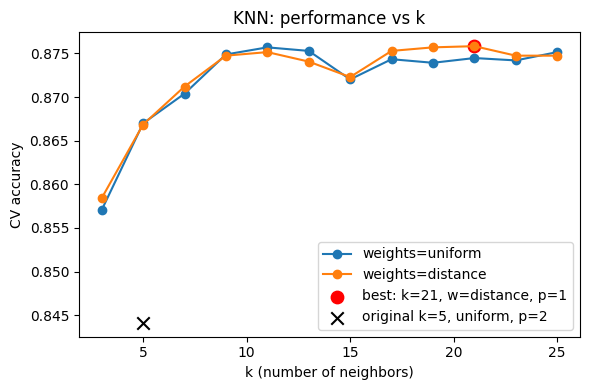

In [ ]:
knn_res = pd.DataFrame(knn_grid.cv_results_)

df_plot = knn_res[knn_res["param_knn__p"] == 1].copy()

plt.figure(figsize=(6,4))
for w in ["uniform", "distance"]:
    sub = df_plot[df_plot["param_knn__weights"] == w]
    # sort by k so lines look nice
    sub = sub.sort_values("param_knn__n_neighbors")
    plt.plot(
        sub["param_knn__n_neighbors"],
        sub["mean_test_score"],
        marker="o",
        label=f"weights={w}"
    )

best = knn_grid.best_params_
best_k = best["knn__n_neighbors"]
best_w = best["knn__weights"]
best_p = best["knn__p"]

best_score = knn_res[
    (knn_res["param_knn__n_neighbors"] == best_k) &
    (knn_res["param_knn__weights"] == best_w) &
    (knn_res["param_knn__p"] == best_p)
]["mean_test_score"].values[0]

plt.scatter([best_k], [best_score], color="red", s=80,
            label=f"best: k={best_k}, w={best_w}, p={best_p}")

orig = knn_res[
    (knn_res["param_knn__n_neighbors"] == 5) &
    (knn_res["param_knn__weights"] == "uniform") &
    (knn_res["param_knn__p"] == 2)
]
if not orig.empty:
    orig_score = orig["mean_test_score"].values[0]
    plt.scatter([5], [orig_score], color="black", marker="x", s=80,
                label="original k=5, uniform, p=2")

plt.xlabel("k (number of neighbors)")
plt.ylabel("CV accuracy")
plt.title("KNN: performance vs k")
plt.legend()
plt.tight_layout()
plt.show()


['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING']
Accuracy of predictions by KNN model on testing set after tuning: 0.8530709196
F1-score of predictions by KNN model on testing set after tuning: 0.8521723368
Per-class recall of predictions by KNN model on testing set after tuning: 0.8530709196

Classification Report after tuning:
                    precision    recall  f1-score   support

           WALKING       0.99      0.93      0.96       537
  WALKING_UPSTAIRS       0.84      0.72      0.78       491
WALKING_DOWNSTAIRS       0.77      0.91      0.83       532
           SITTING       0.75      1.00      0.85       496
          STANDING       0.97      0.69      0.81       420
            LAYING       0.91      0.83      0.87       471

          accuracy                           0.85      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.85      0.85      2947


Confusion Matrix after tun

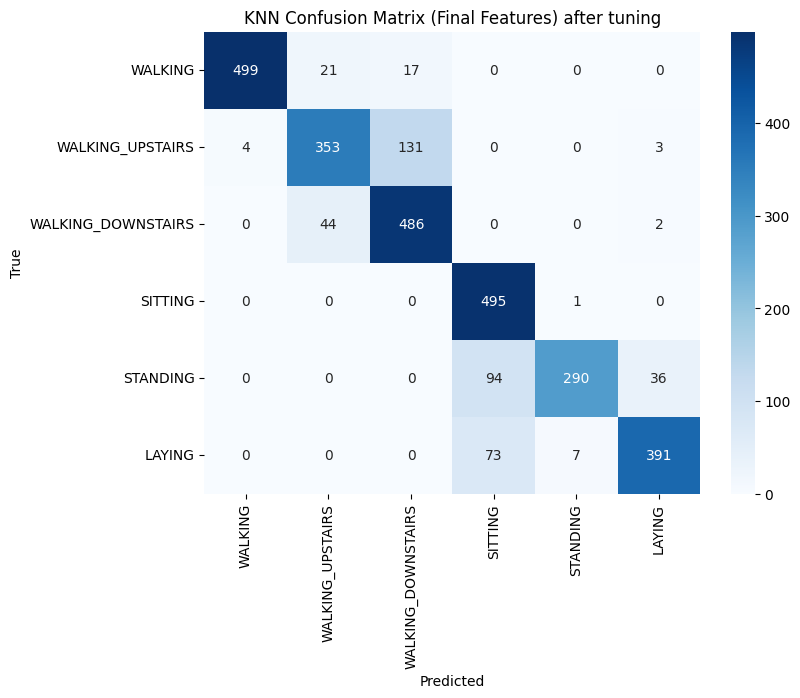

In [ ]:
# model after tuning
model_after = KNeighborsClassifier(n_neighbors=21)
model_after.fit(X_train_scaled, y_train["Activity"]) # train using training sets

prediction_after = model_after.predict(X_test_scaled) # making predictions on testing sets

print(prediction_after)


# evaluate accuracy of KNN model before hyperparameter tuning
accuracy_after = accuracy_score(y_test['Activity'], prediction_after)
print("Accuracy of predictions by KNN model on testing set after tuning:",
      round(accuracy_after, 10))

# F1-score of KNN model before hyperparameter tuning
f1_after = f1_score(y_test['Activity'], prediction_after, average='weighted')
print("F1-score of predictions by KNN model on testing set after tuning:",
      round(f1_after, 10))

# Per-class recall of KNN model before hyperparameter tuning
recall_after = recall_score(y_test['Activity'], prediction_after, average='weighted')
print("Per-class recall of predictions by KNN model on testing set after tuning:",
      round(recall_after, 10))

# Classification Report
print("\nClassification Report after tuning:")
print(classification_report(
    y_test["Activity"], prediction_after,
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))

# Confusion Matrix of KNN model before hyperparameter tuning
print("\nConfusion Matrix after tuning:")
cm_after = confusion_matrix(y_test["Activity"], prediction_after)
plt.figure(figsize=(8,6))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues',
            xticklabels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"],
            yticklabels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix (Final Features) after tuning")
plt.show()

In [ ]:
# Evaluation metrics

# Accuracy:

# F1

# Per-class recall

# Confusion Matrix

##**Weighted KNN before Hyperparameter**

In [ ]:
# Assuming X_train and y_train are your training data and labels
# Calculate class frequencies (optional, for guidance)
unique_classes, class_counts = np.unique(y_train['Activity'], return_counts=True)


print(class_counts)

[1407 1286 1374 1226  986 1073]


In [ ]:
# Train KNN with weighted classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train["Activity"]) # train using training sets

prediction = model.predict(X_test_scaled) # making predictions on testing sets